In [1]:
import pandas as pd 

In [2]:
imdb_df = pd.read_csv('IMDB Dataset.csv')

In [3]:
imdb_df.info() #shows 19999 records with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     19999 non-null  object
 1   sentiment  19999 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [4]:
imdb_sample_df = imdb_df.sample(n= 15000, random_state= 42)#randomly picking 15000 records from the main data
imdb_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 10650 to 13861
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     15000 non-null  object
 1   sentiment  15000 non-null  object
dtypes: object(2)
memory usage: 351.6+ KB


In [5]:
imdb_sample_df = imdb_sample_df.reset_index(drop= True)

In [8]:
imdb_sample_df

,review,sentiment
0,I don't want to bore everyone by reiterating w...,positive
1,"I like Wes Studi & especially Adam Beach, but ...",negative
2,"I'm sure this was one of those ""WOAH!"" attract...",negative
3,"As a fan of Henriksen (I liked him in the ""Mil...",negative
4,Best animated movie ever made. This film explo...,positive
...,...,...
14995,Harlan Knowles (Lance Henriksen) brings a grou...,negative
14996,I can't help thinking that this is Franco's 'h...,negative
14997,The movie starts in spring 2001. A soldier nam...,negative
14998,I found the first bit of stop motion animation...,negative


In [9]:
imdb_sample_df['sentiment'] = imdb_sample_df['sentiment'].map({'positive': 1, 'negative': 0})

In [10]:
imdb_sample_df.head()

,review,sentiment
0,I don't want to bore everyone by reiterating w...,1
1,"I like Wes Studi & especially Adam Beach, but ...",0
2,"I'm sure this was one of those ""WOAH!"" attract...",0
3,"As a fan of Henriksen (I liked him in the ""Mil...",0
4,Best animated movie ever made. This film explo...,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<AxesSubplot:xlabel='sentiment', ylabel='count'>

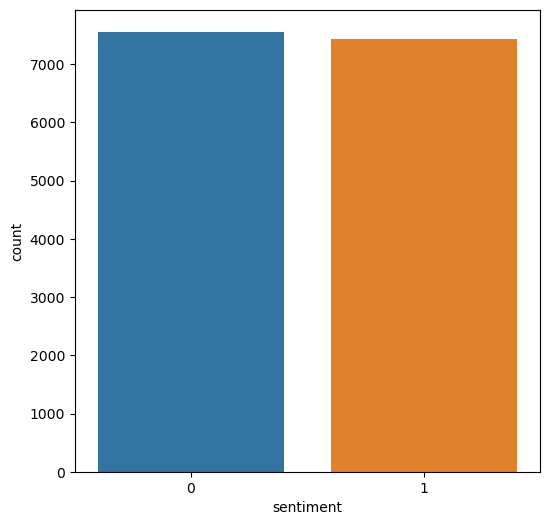

In [21]:
plt.figure(figsize=(6,6))
sn.countplot(x= 'sentiment', data= imdb_sample_df)#checking if the positive and negative comments data is not
#imbalanced

In [23]:
imdb_sample_df['sentiment'].value_counts(normalize= True)#data is balanced with sentiments. Therefore, 
#under-sampling, over-sampling is not required

0    0.503933
1    0.496067
Name: sentiment, dtype: float64

In [24]:
import re
import nltk

# performing text cleaning and preprocessing

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

In [29]:
corpus = []
for i in range(0,len(imdb_sample_df)):
    review = re.sub('[^a-zA-Z]', ' ', imdb_sample_df['review'][i])
    review = review.lower()
    review = review.split()#extracting words out of a sentence that is tokens
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)#re joining words or tokens to create a sentence
    corpus.append(review)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words= 'english')
X = cv.fit_transform(corpus).toarray()

In [31]:
Y = imdb_sample_df['sentiment']
Y

0        1
1        0
2        0
3        0
4        1
        ..
14995    0
14996    0
14997    0
14998    0
14999    1
Name: sentiment, Length: 15000, dtype: int64

# finding max_features required

In [32]:
import numpy as np

In [33]:
featurecount = np.sum(X, axis= 0)

In [34]:
features = cv.get_feature_names_out()

In [35]:
featurecountdf = pd.DataFrame(dict(features = features, counts = featurecount))

In [36]:
featurecountdf

,features,counts
0,aa,5
1,aaa,4
2,aaaaahhhh,1
3,aaaarrgh,1
4,aaaggghhhhhhh,1
...,...,...
54131,zzzzzzzzzzzzz,1
54132,zzzzzzzzzzzzzzzzzz,1
54133,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1
54134,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1


In [37]:
len(featurecountdf[featurecountdf.counts == 1])#checking count of words that occured only once

20628

# performing bag of words

In [38]:
cv = CountVectorizer(stop_words= 'english', max_features= 5000)

In [39]:
X = cv.fit_transform(corpus).toarray()

# splitting the dataset into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

# performing modeling

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
mnb = MultinomialNB()
sentiment_detection_model = mnb.fit(X_train, y_train)

In [45]:
#prediciton
y_pred = sentiment_detection_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8395555555555556


In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2293
           1       0.83      0.85      0.84      2207

    accuracy                           0.84      4500
   macro avg       0.84      0.84      0.84      4500
weighted avg       0.84      0.84      0.84      4500



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

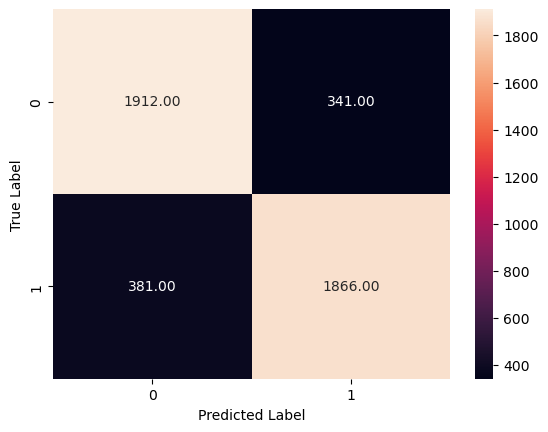

In [52]:
sn.heatmap(cm, annot= True, fmt= '.2f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
#confusion_matrix shows the true and predicted values are having more accurate numbers

In [57]:
from sklearn.metrics import roc_curve, auc

In [55]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/var/folders/3q/2bh9znv97bl09382p2y_xj9m0000gn/T/ipykernel_3905/1878658684.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k--', color = 'red', label = 'ROC Curve = (are = {0:.2f})'.format(roc_auc), lw = 2)


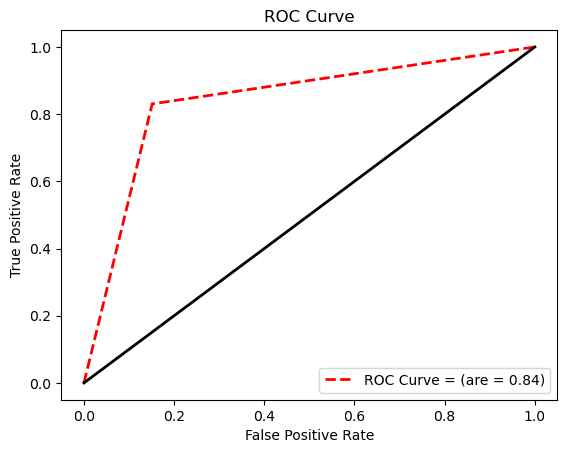

In [58]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, 'k--', color = 'red', label = 'ROC Curve = (are = {0:.2f})'.format(roc_auc), lw = 2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# testing with reviews

In [65]:
def split_words(words):
    review = re.sub('[^a-zA-Z]', ' ', words)
    review = review.lower()
    review = review.split()#extracting words out of a sentence that is tokens
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)#re joining words or tokens to create a sentence
    return review

In [78]:
testreview = {"It is this combination of maximalism, nationalism, fatalism, and two-dimensional characterization that makes this one of the most enjoyable current franchises.":"positive",
             "Disappointingly, the film’s female characters are given precious little to do beyond dying in order to motivate the male protagonists, and in many ways, this is ultimately a story about fathers making sacrifices for the sake of their children.":"negative",
             "In sci-fi terms, The Wandering Earth II feels less obviously derivative of Hollywood forerunners than its predecessor, raising a number of intriguing themes and engaging with them intellectually. It marks another confident leap forward for China’s ambitions to explore the genre and its infinite universe of possibilities.":"positive"}
clean_review = []

for i in testreview.keys():
    clean_review.append(split_words(i))
vector_comment = cv.transform(clean_review)
vector_comment = vector_comment.toarray()

In [79]:
predict = sentiment_detection_model.predict(vector_comment)
result = {1: 'positive', 0: 'negative'}
values = list(testreview.values())

In [86]:
print("comment num \tpredict \treal")
for i, val in enumerate(predict):
    print(f"comment {i+1} \t{result[val]} \t{values[i]}")

comment num 	predict 	real
comment 1 	negative 	positive
comment 2 	negative 	negative
comment 3 	positive 	positive
